In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)
coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200) #this is a sample of coffee_full

In [16]:
coffee_red.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [17]:
coffee_full.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [18]:
coffee_full.shape

(2974, 4)

In [19]:
coffee_red.shape

(200, 4)

In [20]:
coffee_red.drinks_coffee.mean() #60% individuals drink coffee from our sample

0.595

In [21]:
coffee_red[coffee_red['drinks_coffee'] == True].mean()

user_id          5047.378151
drinks_coffee       1.000000
height             68.119630
dtype: float64

In [23]:
#we want mean of only height
coffee_red[coffee_red['drinks_coffee'] == True]['height'].mean() #68 is there average height

68.11962990858618

In [24]:
bootsample = coffee_red.sample(200,replace=True)
bootsample[bootsample['drinks_coffee'] == True]['height'].mean()

68.25918199231297

(array([9.000e+00, 7.600e+01, 5.530e+02, 2.000e+03, 3.477e+03, 2.808e+03,
        9.240e+02, 1.470e+02, 5.000e+00, 1.000e+00]),
 array([67.05907261, 67.28594335, 67.51281409, 67.73968483, 67.96655556,
        68.1934263 , 68.42029704, 68.64716777, 68.87403851, 69.10090925,
        69.32777998]),
 <a list of 10 Patch objects>)

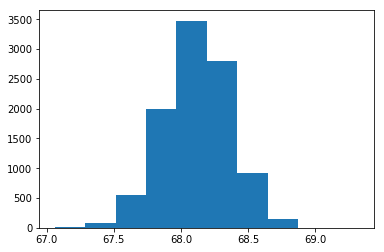

In [26]:
boot_means = []

for _ in range(10000):
    bootsample = coffee_red.sample(200,replace=True)
    boot_means.append(bootsample[bootsample['drinks_coffee'] == True]['height'].mean())
    
plt.hist(boot_means)

In [28]:
np.percentile(boot_means, 2.5), np.percentile(boot_means,97.5)

#we are cutting off bottom 2.5% and top 2.5%. We build 95% in the middle portion

(67.63097839740465, 68.59589334187528)

## Confidence Interval Interpretation
We are 95% confident the mean height of all coffee drinkers is between 67.63 and 68.60 inches tall 

In [29]:
#lets cross check it with actual population

coffee_full[coffee_full['drinks_coffee']==True]['height'].mean()

68.40021025548401